In [131]:
import pandas as pd 
import numpy as np
import os 
import sys 
target_job = '4082885'

In [132]:
# First 
names = {} # index to string of names
datasets = ['ionosphere', 'mammo_graphic', 'cleveland', 'wisconsin']
models = ['GP_model', 'MOGP_model', 'NCLMOGP_model', 'PFMOGP_model']
for i,model in enumerate(models):
    for j, dataset in enumerate(datasets):
        names[(i * len(datasets)) + j + 1] = f'{model}{dataset}'
print(names.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])


In [144]:
 # Can be issues here looping through and grabbing the descriptioin
# First load data in 
data = {}
for fn in os.listdir(f'results_file/{target_job}/'):
    fn2 = os.listdir(f'results_file/{target_job}/{fn}/')[1] 
    if '.txt' in fn2:
        fn2 = os.listdir(f'results_file/{target_job}/{fn}/')[0] 
    print(fn2)
    f = f'results_file/{target_job}/{fn}/{fn2}'
    data[int(fn)] = pd.read_csv(f, index_col=False)
print(f'Number of results files in job {target_job} = {len(data)}')

divmogp_experiment_job_4077539_task_9_ionosphere.csv
divmogp_experiment_job_4077539_task_11_cleveland.csv
divmogp_experiment_job_4077539_task_7_cleveland.csv
divmogp_experiment_job_4077539_task_16_wisconsin.csv
divmogp_experiment_job_4077539_task_6_mammo_graphic.csv
divmogp_experiment_job_4077539_task_1_ionosphere.csv
divmogp_experiment_job_4077539_task_10_mammo_graphic.csv
divmogp_experiment_job_4077539_task_8_wisconsin.csv
divmogp_experiment_job_4077539_task_4_wisconsin.csv
divmogp_experiment_job_4077539_task_15_cleveland.csv
divmogp_experiment_job_4077539_task_3_cleveland.csv
divmogp_experiment_job_4077539_task_12_wisconsin.csv
divmogp_experiment_job_4077539_task_2_mammo_graphic.csv
divmogp_experiment_job_4077539_task_13_ionosphere.csv
divmogp_experiment_job_4077539_task_5_ionosphere.csv
divmogp_experiment_job_4077539_task_14_mammo_graphic.csv
Number of results files in job 4077539 = 16


In [145]:
# Quick look at the data
data[1] # 1 -> num jobs

,member_generation,training,seed,time,full_acc,majority_acc,minority_acc,tn,fp,fn,tp
0,True,True,0,7.369800e+01,0.955102,0.974522,0.920455,81,7,4,153
1,True,False,0,7.369800e+01,0.773585,0.808824,0.710526,27,11,13,55
2,False,True,0,1.907349e-06,0.955102,0.974522,0.920455,81,7,4,153
3,False,False,0,1.907349e-06,0.773585,0.808824,0.710526,27,11,13,55
4,True,True,169,1.121299e+02,0.959184,0.980892,0.920455,81,7,3,154
...,...,...,...,...,...,...,...,...,...,...,...
115,False,False,4732,1.192093e-06,0.858491,0.882353,0.815789,31,7,8,60
116,True,True,4901,6.672302e+01,0.983673,0.993631,0.965909,85,3,1,156
117,True,False,4901,6.672302e+01,0.877358,0.970588,0.710526,27,11,2,66
118,False,True,4901,9.536743e-07,0.983673,0.993631,0.965909,85,3,1,156


In [146]:
# method to efficently grab correct subsections from 
def get_data(task_id, member_generation=False, training=False, numpy=False):
    x = data[task_id]
    x = x[x['member_generation'] == member_generation] 
    if numpy:
        x = x[x['training'] == training].to_numpy() # [final]
    else:
        x = x[x['training'] == training] # [final]
    return x

<AxesSubplot:xlabel='majority_acc', ylabel='minority_acc'>

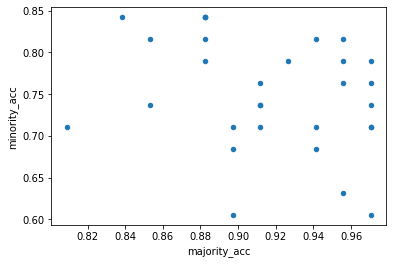

In [147]:
get_data(1).plot.scatter(x='majority_acc', y='minority_acc')

In [148]:
# Get the description for each. 
description = pd.DataFrame(data=[get_data(key)['full_acc'].describe() for key in data.keys()])
description = description.reset_index()
description = description.drop(columns='index')
name_dict = {}
i = 0
for model in models:
    for dataset in datasets:
        name_dict[i] = dataset+'_'+model
        i += 1
description.rename(index=name_dict, inplace=True)
description

,count,mean,std,min,25%,50%,75%,max
ionosphere_GP_model,30.0,0.741195,0.218154,0.358491,0.750000,0.853774,0.875000,0.933962
mammo_graphic_GP_model,30.0,0.745185,0.047044,0.644444,0.711111,0.744444,0.777778,0.844444
cleveland_GP_model,30.0,0.804074,0.045156,0.711111,0.780556,0.811111,0.833333,0.888889
wisconsin_GP_model,30.0,0.955447,0.033741,0.843902,0.946341,0.965854,0.975610,0.990244
ionosphere_MOGP_model,30.0,0.832396,0.022121,0.775100,0.815261,0.837349,0.846386,0.871486
mammo_graphic_MOGP_model,30.0,0.856918,0.032024,0.773585,0.839623,0.858491,0.877358,0.905660
cleveland_MOGP_model,30.0,0.731191,0.119201,0.514056,0.617470,0.789157,0.822289,0.855422
wisconsin_MOGP_model,30.0,0.963415,0.015781,0.926829,0.956098,0.968293,0.970732,0.990244
ionosphere_NCLMOGP_model,30.0,0.961138,0.017162,0.921951,0.951220,0.968293,0.975610,0.985366
mammo_graphic_NCLMOGP_model,30.0,0.749630,0.088636,0.488889,0.708333,0.772222,0.800000,0.900000


Results from bhowan using offeel
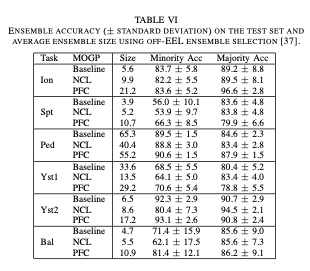

## 